### Basic data analysis or exploratory data analysis (EDA)

In [1]:
#IMPORTING LIBRARIES
#from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style(style = "darkgrid")

In [2]:
# Read Training dataset as well as drop the index column
train = pd.read_csv('C:/Users/Varghese/Desktop/Code/CRA-rough/cra_training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we remove "-" and convert the heading to lowercase 
cleancolumn = []
for i in range(len(train.columns)):
    cleancolumn.append(train.columns[i].replace('-', '').lower())
train.columns = cleancolumn

In [3]:
# print the 5 records of the traiing dataset
train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# Describe the all statistical properties of the training dataset
train[train.columns[1:]].describe()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
#Already shown as the values corresponding to 50% in the previous cell output
train[train.columns[1:]].median()

revolvingutilizationofunsecuredlines       0.154181
age                                       52.000000
numberoftime3059dayspastduenotworse        0.000000
debtratio                                  0.366508
monthlyincome                           5400.000000
numberofopencreditlinesandloans            8.000000
numberoftimes90dayslate                    0.000000
numberrealestateloansorlines               1.000000
numberoftime6089dayspastduenotworse        0.000000
numberofdependents                         0.000000
dtype: float64

In [6]:
train[train.columns[1:]].mean()

revolvingutilizationofunsecuredlines       6.048438
age                                       52.295207
numberoftime3059dayspastduenotworse        0.421033
debtratio                                353.005076
monthlyincome                           6670.221237
numberofopencreditlinesandloans            8.452760
numberoftimes90dayslate                    0.265973
numberrealestateloansorlines               1.018240
numberoftime6089dayspastduenotworse        0.240387
numberofdependents                         0.757222
dtype: float64

In [7]:
# This give you the calulation of the target labels. Which category of the target lebel is how many percentage.
total_len = len(train['seriousdlqin2yrs'])
percentage_labels = (train['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

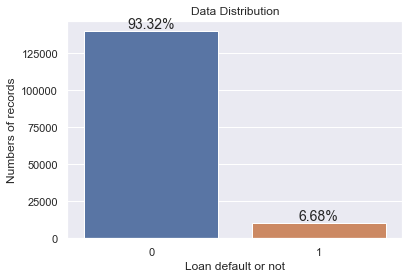

In [8]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(train.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
#ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_xlabel("Loan default or not")
ax.set_ylabel("Numbers of records")
plt.show()


### Missing values

In [9]:
# Counting null values for all columns 
train.isna().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

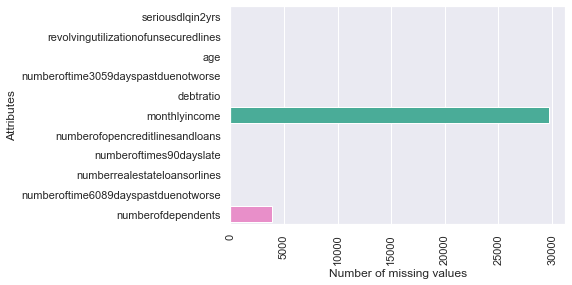

In [11]:
# Graphical representation of the missing values.
y = train.columns
x = train.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
ax.set_xlabel("Number of missing values")
ax.set_ylabel("Attributes")
plt.xticks(rotation=90)
plt.show()

In [12]:
# Actual replacement of the missing value using mean value.
train_mean_replace = train.fillna((train.mean()))
train_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [13]:
train_mean_replace.isna().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [14]:
# Actual replacement of the missing value using median value.
train_median_replace = train.fillna((train.median()))
train_median_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
train_median_replace.isna().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

### Correlation

In [16]:
train.fillna((train.median()), inplace=True)
# Get the correlation of the training dataset
train[train.columns[1:]].corr()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
revolvingutilizationofunsecuredlines,1.000000,-0.005898,-0.001314,0.003961,0.006513,-0.011281,-0.001061,0.006235,-0.001048,0.001193
age,-0.005898,1.000000,-0.062995,0.024188,0.027581,0.147705,-0.061005,0.033150,-0.057159,-0.215693
numberoftime3059dayspastduenotworse,-0.001314,-0.062995,1.000000,-0.006542,-0.008370,-0.055312,0.983603,-0.030565,0.987005,-0.004590
debtratio,0.003961,0.024188,-0.006542,1.000000,-0.018006,0.049565,-0.008320,0.120046,-0.007533,-0.044476
monthlyincome,0.006513,0.027581,-0.008370,-0.018006,1.000000,0.086949,-0.010500,0.116273,-0.009252,0.066314
numberofopencreditlinesandloans,-0.011281,0.147705,-0.055312,0.049565,0.086949,1.000000,-0.079984,0.433959,-0.071077,0.074026
numberoftimes90dayslate,-0.001061,-0.061005,0.983603,-0.008320,-0.010500,-0.079984,1.000000,-0.045205,0.992796,-0.011962
numberrealestateloansorlines,0.006235,0.033150,-0.030565,0.120046,0.116273,0.433959,-0.045205,1.000000,-0.039722,0.129399
numberoftime6089dayspastduenotworse,-0.001048,-0.057159,0.987005,-0.007533,-0.009252,-0.071077,0.992796,-0.039722,1.000000,-0.012678
numberofdependents,0.001193,-0.215693,-0.004590,-0.044476,0.066314,0.074026,-0.011962,0.129399,-0.012678,1.000000


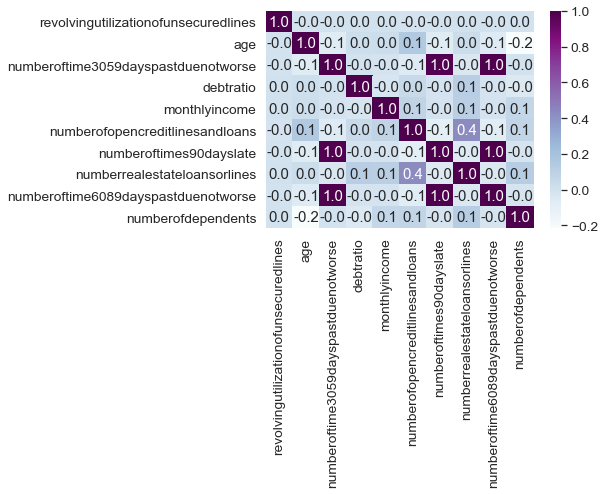

In [20]:
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(train[train.columns[1:]].corr(),annot=True,fmt=".1f",cmap="BuPu")
plt.show()

### Feature Importance

In [53]:
train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2.0,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0.0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1.0,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0.0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1.0,0.024926,63588.0,7,0,1,0,0.0


In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
train.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [57]:
X = train.drop('seriousdlqin2yrs', axis=1)
y = train.seriousdlqin2yrs
features_label = train.columns[1:]
forest = RandomForestClassifier (n_estimators = 1000, random_state=0, n_jobs = 4)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.186719
 2) age                            0.153397
 3) numberoftime3059dayspastduenotworse 0.151397
 4) debtratio                      0.140355
 5) monthlyincome                  0.095936
 6) numberofopencreditlinesandloans 0.092444
 7) numberoftimes90dayslate        0.050161
 8) numberrealestateloansorlines   0.049342
 9) numberoftime6089dayspastduenotworse 0.044035
10) numberofdependents             0.036215


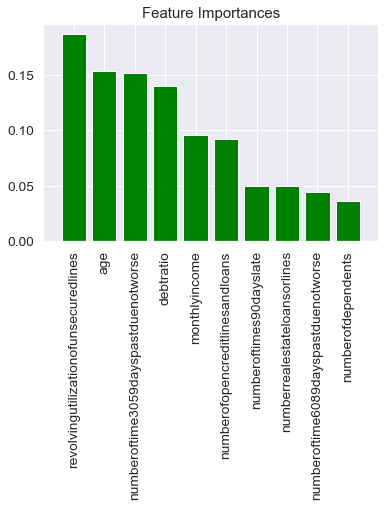

In [58]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train and build baseline model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [60]:
X = train.drop('seriousdlqin2yrs', axis=1)
y = train.seriousdlqin2yrs

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [62]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [63]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [64]:
knMod.score(X_test, y_test)

0.9317866666666667

In [65]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [66]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5992601284020583

In [67]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [68]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [69]:
glmMod.score(X_test, y_test)

0.9330133333333334

In [70]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [71]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8263767949724746

In [72]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [74]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [75]:
adaMod.score(X_test, y_test)

0.9347466666666666

In [76]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [77]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8577779576702991

In [78]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [79]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
gbMod.score(X_test, y_test)

0.93512

In [82]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [83]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.862717544009135

In [84]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [85]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [86]:
rfMod.score(X_test, y_test)

0.9317066666666667

In [87]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [88]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.772222431046144

### Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score
def cvDictGen(functions, scr, X_train=X, y_train=y, cv=5, verbose=1):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

In [91]:
cvD = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], scr='roc_auc')
cvD

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.6s finished


{'KNeighborsClassifier': [0.5968549863186849, 0.0016642383091099214],
 'LogisticRegression': [0.8281703011948585, 0.004624670100621067],
 'AdaBoostClassifier': [0.8594612997373258, 0.002486697797054552],
 'GradientBoostingClassifier': [0.8645397214450977, 0.0030677243106447495],
 'RandomForestClassifier': [0.780151674043424, 0.0038693068594688727]}

### Hyper parameter optimization using Randomized search

In [92]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#### AdaBoost

In [93]:
adaHyperParams = {'n_estimators': [10,50,100,200,420]}

In [97]:
gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.1s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.4s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.3s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   5.3s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  7.5min finished


In [98]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 100}, 0.8586147202751931)

#### GradientBoosting

In [99]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [100]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] loss=exponential, max_depth=2, n_estimators=264 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. loss=exponential, max_depth=2, n_estimators=264, total= 1.2min
[CV] loss=exponential, max_depth=2, n_estimators=264 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] .. loss=exponential, max_depth=2, n_estimators=264, total=  46.4s
[CV] loss=exponential, max_depth=2, n_estimators=264 .................
[CV] .. loss=exponential, max_depth=2, n_estimators=264, total=  39.5s
[CV] loss=exponential, max_depth=2, n_estimators=264 .................
[CV] .. loss=exponential, max_depth=2, n_estimators=264, total=  39.6s
[CV] loss=exponential, max_depth=2, n_estimators=264 .................
[CV] .. loss=exponential, max_depth=2, n_estimators=264, total=  41.3s
[CV] loss=deviance, max_depth=4, n_estimators=20 .....................
[CV] ...... loss=deviance, max_depth=4, n_estimators=20, total=   5.2s
[CV] loss=deviance, max_depth=4, n_estimators=20 .....................
[CV] ...... loss=deviance, max_depth=4, n_estimators=20, total=   5.0s
[CV] loss=deviance, max_depth=4, n_estimators=20 .....................
[CV] ...... loss=deviance, max_depth=4, n_estimators=20, total=   5.0s
[CV] loss=deviance, max_depth=4, n_estimators=20 .....................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 38.6min finished


In [101]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 2, 'n_estimators': 264},
 0.8638752596052139)

### Train models with help of new hyper parameter

In [102]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [103]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [104]:
cvDictbestpara = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [105]:
cvDictbestpara

{'GradientBoostingClassifier': [0.864031655452623, 0.003108258068310543],
 'AdaBoostClassifier': [0.8596624756813425, 0.0024609417593873567]}

In [106]:
test_labels=bestGbModFitted.predict_proba(np.array(X_test.values))[:,1]

In [107]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8623133261891912

In [108]:
test_labels=bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]

In [109]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8578492110941812

### Feature Transformation

In [110]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_train_1 = np.array(X_train)
X_train_transform = transformer.transform(X_train_1)

In [111]:
bestGbModFitted_transformed = gridSearchGB.best_estimator_.fit(X_train_transform, y_train)

In [112]:
bestAdaModFitted_transformed = gridSearchAda.best_estimator_.fit(X_train_transform, y_train)

In [113]:
cvDictbestpara_transform = cvDictGen(functions=[bestGbModFitted_transformed, bestAdaModFitted_transformed],
                                     scr='roc_auc')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [114]:
cvDictbestpara_transform

{'GradientBoostingClassifier': [0.8640297954838629, 0.003109853458502031],
 'AdaBoostClassifier': [0.8596624756813425, 0.0024609417593873567]}

In [115]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
X_test_1 = np.array(X_test)
X_test_transform = transformer.transform(X_test_1)



In [116]:
X_test_transform

array([[0.03888474, 3.8501476 , 0.        , ..., 0.69314718, 0.        ,
        1.09861229],
       [0.1836539 , 3.8918203 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.47987779, 4.04305127, 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       ...,
       [0.69314218, 3.76120012, 0.        , ..., 0.        , 0.        ,
        1.38629436],
       [0.08665659, 4.21950771, 0.        , ..., 1.09861229, 0.        ,
        0.        ],
       [0.69314218, 4.12713439, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [117]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [118]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8623299758161636

In [119]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [120]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8578309966949647

### Voting based ensemble model

In [121]:
from sklearn.ensemble import VotingClassifier
votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted_transformed), 
                                         ('ada', bestAdaModFitted_transformed)], voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train_transform, y_train)

In [122]:
test_labels=votingMod.predict_proba(np.array(X_test_transform))[:,1]

In [145]:
print(votingMod.score(X_test_transform, y_test))

0.93224


In [124]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8622678408492439

In [125]:
from sklearn.ensemble import VotingClassifier
votingMod_old = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod_old = votingMod.fit(X_train, y_train)

In [126]:
test_labels=votingMod_old.predict_proba(np.array(X_test.values))[:,1]

In [144]:
print(votingMod.score(X_test, y_test))

0.93552


In [127]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8622650490253838

### Testing on Real Test Dataset

In [133]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('C:/Users/Varghese/Desktop/Code/CRA-rough/cra_test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [134]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((train.median()), inplace=True)

In [135]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [136]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [137]:
output.to_csv("predictions.csv", index=False)

In [138]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

In [139]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [140]:
output1 = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [141]:
#Writing output to csv
output1.to_csv("predictions1.csv", index=False)